In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
#Tensorboard Visualization
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(300,kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(300,kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(10,activation='softmax',kernel_initializer="he_normal"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)              

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [12]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [13]:
history = model.fit(X_train_full, y_train_full, epochs=150,validation_split=0.1,callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])
#run in terminal tensorboard --logdir=./my_logs --port=6006 and open http://localhost:6006/ in browser

Train on 54000 samples, validate on 6000 samples
Epoch 1/150
54000/54000 [==============================] - 8s 140us/sample - loss: 0.5509 - accuracy: 0.8027 - val_loss: 0.3736 - val_accuracy: 0.8558
Epoch 2/150
54000/54000 [==============================] - 5s 99us/sample - loss: 0.4190 - accuracy: 0.8470 - val_loss: 0.3813 - val_accuracy: 0.8585
Epoch 3/150
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3831 - accuracy: 0.8591 - val_loss: 0.3376 - val_accuracy: 0.8747
Epoch 4/150
54000/54000 [==============================] - 5s 99us/sample - loss: 0.3570 - accuracy: 0.8687 - val_loss: 0.3286 - val_accuracy: 0.8835
Epoch 5/150
54000/54000 [==============================] - 6s 106us/sample - loss: 0.3363 - accuracy: 0.8764 - val_loss: 0.3260 - val_accuracy: 0.8800
Epoch 6/150
54000/54000 [==============================] - 5s 102us/sample - loss: 0.3194 - accuracy: 0.8824 - val_loss: 0.3226 - val_accuracy: 0.8773
Epoch 7/150
54000/54000 [=======================

In [14]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3003 - accuracy: 0.8936


[0.30025175251960756, 0.8936]

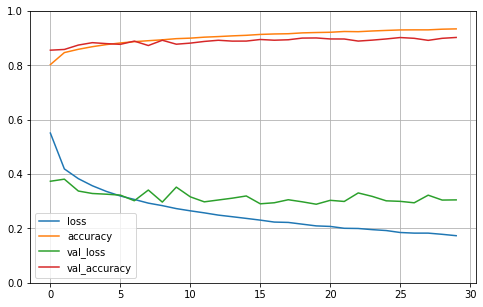

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### when using RMSProp it was very bad (not stable) for validation loss , also acc was 88.92%

### load model

In [17]:
model_loaded = keras.models.load_model("my_keras_model.h5")

In [18]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)              

In [31]:
X_new = X_test[:5]
classes = [class_names[class_name] for class_name in model_loaded.predict_classes(X_new)]
print(classes)

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
